# Medicare Telehealth Trends

Telehealth has several advantages when delivering healthcare to Medicare-enrolled participants. Telehealth allows providers the ability to care for people with mobility limitations and is accessible to patients in rural areas. The Covid-19 pandemic further emphasized the importance of providing telehealth services to older adults. <br> This study aims to determine if there is a significant difference in telehealth usage by Medicare participants between rural and urban areas, and if there is a significant difference between telehealth usage in different age groups.

This dataset was taken from https://data.cms.gov/summary-statistics-on-use-and-payments/medicare-service-type-reports/medicare-telehealth-trends. This dataset provides information about telehealth usage by people with Medicare between January 1, 2020 and December 31, 2023.

This notebook includes the following components:
1) Data Cleaning and Visualization <br>
2) Hypothesis Test 1: (HA) There is a significant difference between telehealth usage in rural and urban areas. <br>
3) Hypothesis Test 2: (HA) There is a significant difference between telehealth usage in different age groups. <br>
4) Analysis and Limitations <br>

### 1) Data Cleaning and Visualization

This dataset contains a total of 24080 rows and 13 columns with information relating to race/ethnicity, sex, age and rural/urban geography categorized by state.
The only columns will null values were Total_Bene_TH_Elig, Total_PartB_Enrl, Total_Bene_Telehealth, Pct_Telehealth and each contained under 11% null values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.ticker import FuncFormatter
%matplotlib inline
#read data
ds = pd.read_csv("datasets/Medicare_Telehealth_Trends_Q4_2023.csv")
ds

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
0,2020,Overall,National,All,All,All,All,All,All,30946785.0,3.224489e+07,14826919.0,0.4791
1,2020,Overall,National,All,All,All,All,All,Rural,7179538.0,7.490301e+06,2858284.0,0.3981
2,2020,Overall,National,All,All,All,All,All,Urban,23696871.0,2.462914e+07,11944230.0,0.5040
3,2020,Overall,National,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
4,2020,Overall,National,All,All,All,All,0-64,All,4088345.0,4.291403e+06,2322324.0,0.5680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24075,2023,4,Virginia,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
24076,2023,4,Washington,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
24077,2023,4,West Virginia,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
24078,2023,4,Wisconsin,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN


In [2]:
#check for NA counts in each column (as a percentage of total rows?)
ds.isnull().sum()

Year                           0
quarter                        0
Bene_Geo_Desc                  0
Bene_Mdcd_Mdcr_Enrl_Stus       0
Bene_Race_Desc                 0
Bene_Sex_Desc                  0
Bene_Mdcr_Entlmt_Stus          0
Bene_Age_Desc                  0
Bene_RUCA_Desc                 0
Total_Bene_TH_Elig          2549
Total_PartB_Enrl            2549
Total_Bene_Telehealth       2585
Pct_Telehealth              2587
dtype: int64

In [3]:
# Since the number of nulls in the outcome variable Pct_Telehealth is low, we will drop all null values.
ds2 = ds.dropna(subset=['Pct_Telehealth'])
# To understand how the data is broken out by date
print(ds2['quarter'].value_counts())
# It looks like there is both quarterly data and yearly data. Let's focus on yearly for now.
ds2 = ds2[ds2['quarter'] == "Overall"]
# We'd like to retain information that is categorized by state, so we'll filter out rows at the "National" level
ds2 = ds2[ds2['Bene_Geo_Desc'] != "National"]
# We are not considering categorical columns like Race/Ethnicity Description and Sex Description in this analysis
# For all such categorical columns, we will filter for "ALL"
ds2 = ds2[ds2['Bene_Mdcd_Mdcr_Enrl_Stus'] == "All"]
ds2 = ds2[ds2['Bene_Race_Desc'] == "All"]
ds2 = ds2[ds2['Bene_Sex_Desc'] == "All"]
ds2 = ds2[ds2['Bene_Mdcr_Entlmt_Stus'] == "All"]
ds2 = ds2[ds2['Bene_Age_Desc'] == "All"]
# We'd like to retain information categorized as "Rural" or "Urban", so we'll filter out rows with "All"
ds2 = ds2[ds2['Bene_RUCA_Desc'] != "All"]
# Now that we've completed filtering, we can drop the columns that we don't need for this analysis
ds2 = ds2.drop(columns=['Bene_Mdcd_Mdcr_Enrl_Stus', 'Bene_Race_Desc', 'Bene_Sex_Desc', 'Bene_Mdcr_Entlmt_Stus', 'Bene_Age_Desc'])
ds2

Overall    4304
2          4299
3          4298
1          4296
4          4296
Name: quarter, dtype: int64


,Year,quarter,Bene_Geo_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
184,2020,Overall,Alabama,Rural,147873.0,150932.916670,56053.0,0.3791
185,2020,Overall,Alaska,Rural,37859.0,42692.166667,17169.0,0.4535
186,2020,Overall,Arizona,Rural,97867.0,106532.250000,43229.0,0.4417
187,2020,Overall,Arkansas,Rural,180185.0,186186.333330,66119.0,0.3670
188,2020,Overall,California,Rural,301085.0,328365.166670,162941.0,0.5412
...,...,...,...,...,...,...,...,...
18341,2023,Overall,Virginia,Urban,726537.0,739510.750000,163473.0,0.2250
18342,2023,Overall,Washington,Urban,492684.0,524827.083330,128951.0,0.2617
18343,2023,Overall,West Virginia,Urban,123033.0,126857.250000,24890.0,0.2023
18344,2023,Overall,Wisconsin,Urban,298602.0,305843.666670,56832.0,0.1903


Text(0.5, 1.0, 'Telehealth Users by State')

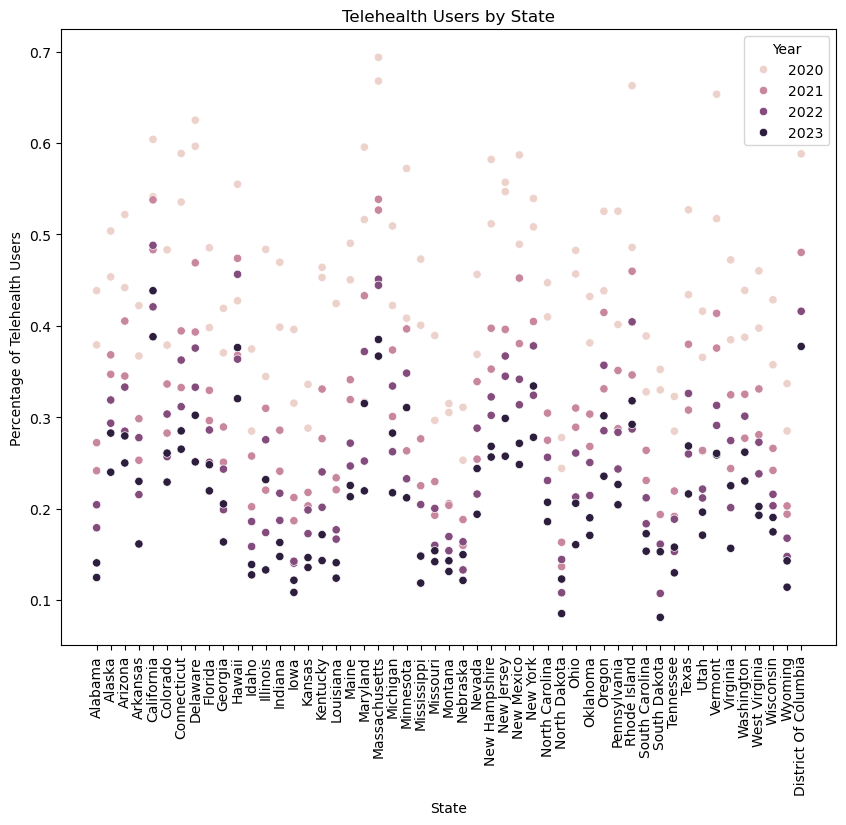

In [44]:
# Visualization of Telehealth users by State
plt.figure(figsize=(10,8))
ax = sns.scatterplot(data=ds2, x="Bene_Geo_Desc", y="Pct_Telehealth", hue="Year")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Percentage of Telehealth Users")
plt.title("Telehealth Users by State")

Notably, the year 2020 appears to have greater telehealth usage than other years.

Text(0.5, 1.0, 'Telehealth Users by Geography')

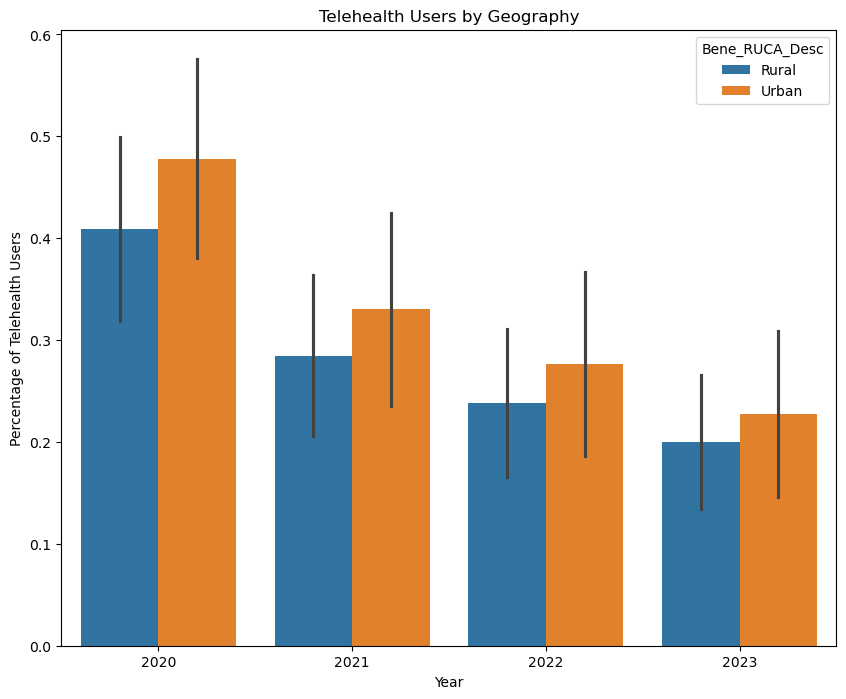

In [45]:
# Visualization of Rural Vs Urban Telehealth users over the Years
plt.figure(figsize=(10,8))
ax = sns.barplot(data=ds2, x="Year", y="Pct_Telehealth", hue="Bene_RUCA_Desc", errorbar="sd")
plt.ylabel("Percentage of Telehealth Users")
plt.title("Telehealth Users by Geography")

Telehealth usage appears to be lower in Rural areas than Urban areas.

Text(0.5, 1.0, 'Telehealth Users by Age')

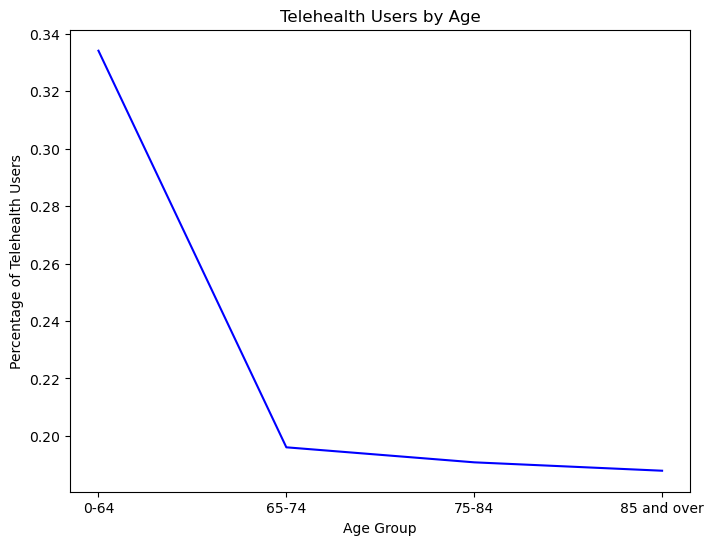

In [46]:
# Visualization of Telehealth users by Age Group
plt.figure(figsize=(8,6))
age = ds.groupby("Bene_Age_Desc").mean()
age = age.drop(index=('All'))
sns.lineplot(data=age, x = age.index, y="Pct_Telehealth", color="blue")
plt.ylabel("Percentage of Telehealth Users")
plt.xlabel("Age Group")
plt.title("Telehealth Users by Age")

Telehealth usage sees a drop after age 65 and continues declining with age.

In [47]:
# According to data dictionary, Pct_Telehealth is the percent of Total Telehealth Users / Total Telehealth Eligible Users.
# Let's do a check to make sure this column is valid
ds2['Pct_Telehealth_check'] = ds2['Total_Bene_Telehealth'] / ds2['Total_Bene_TH_Elig']
# round this column to 4 sig figs
ds2['Pct_Telehealth_check'] = ds2.Pct_Telehealth_check.apply(lambda x : round(x, 4))
# check if this column equals Pct_Telehealth
print(ds2['Pct_Telehealth'].equals(ds2['Pct_Telehealth_check']))
ds2

True


,Year,quarter,Bene_Geo_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth,Pct_Telehealth_check
184,2020,Overall,Alabama,Rural,147873.0,150932.916670,56053.0,0.3791,0.3791
185,2020,Overall,Alaska,Rural,37859.0,42692.166667,17169.0,0.4535,0.4535
186,2020,Overall,Arizona,Rural,97867.0,106532.250000,43229.0,0.4417,0.4417
187,2020,Overall,Arkansas,Rural,180185.0,186186.333330,66119.0,0.3670,0.3670
188,2020,Overall,California,Rural,301085.0,328365.166670,162941.0,0.5412,0.5412
...,...,...,...,...,...,...,...,...,...
18341,2023,Overall,Virginia,Urban,726537.0,739510.750000,163473.0,0.2250,0.2250
18342,2023,Overall,Washington,Urban,492684.0,524827.083330,128951.0,0.2617,0.2617
18343,2023,Overall,West Virginia,Urban,123033.0,126857.250000,24890.0,0.2023,0.2023
18344,2023,Overall,Wisconsin,Urban,298602.0,305843.666670,56832.0,0.1903,0.1903


### 2) Hypothesis Test 1: (HA) There is a significant difference between telehealth usage in rural and urban areas. <br>

Null hypothesis: There is no significant difference in telehealth usage between rural and urban areas. <br>
We will perform a two-sample t-test. The following assumptions have been made:
1) The two sample groups are independent (rural/urban) <br>
2) The data follows a normal distribution <br>

We use significance level of 0.05.

In [69]:
import scipy.stats as stats

In [70]:
# Creating two datasets for urban and rural respectively
rural = ds2[ds2['Bene_RUCA_Desc'] == "Rural"]
urban = ds2[ds2['Bene_RUCA_Desc'] == "Urban"]
# Grouping by State and using the mean telehealth usage over the years
rural = rural.groupby("Bene_Geo_Desc").mean()
urban = urban.groupby("Bene_Geo_Desc").mean()

In [71]:
# Only keeping the columns of interest for the two sample t-test
rural = rural[['Pct_Telehealth']]
urban = urban[['Pct_Telehealth']]

In [72]:
stats.ttest_ind(a=rural,b=urban)

Ttest_indResult(statistic=array([-2.76841624]), pvalue=array([0.00672501]))

Since the p-value of 0.00672 is smaller than alpha = 0.05, we reject the null hypothesis. There is sufficient evidence to conclude that the mean telehealth usage in urban areas is significantly different from the mean telehealth usage in rural areas.

### 3) Hypothesis Test 2: (HA) There is a significant difference between telehealth usage in different age groups. <br>

Null hypothesis: There is no significant difference in telehealth usage between age groups <br>
We will perform a one-way ANOVA.

The following assumptions have been made:
1) The two sample groups are independent (rural/urban) <br>
2) The data follows a normal distribution <br>

We use significance level of 0.05.

In [77]:
# Completing data cleaning steps as done before
ds3 = ds.dropna(subset=['Pct_Telehealth'])
# It looks like there is both quarterly data and yearly data. Let's focus on yearly for now.
ds3 = ds3[ds3['quarter'] == "Overall"]
# We'd like to retain information that is categorized by state, so we'll filter out rows at the "National" level
ds3 = ds3[ds3['Bene_Geo_Desc'] != "National"]
# We are not considering categorical columns like Race/Ethnicity Description and Sex Description in this analysis
# For all such categorical columns, we will filter for "ALL"
ds3 = ds3[ds3['Bene_Mdcd_Mdcr_Enrl_Stus'] == "All"]
ds3 = ds3[ds3['Bene_Race_Desc'] == "All"]
ds3 = ds3[ds3['Bene_Sex_Desc'] == "All"]
ds3 = ds3[ds3['Bene_Mdcr_Entlmt_Stus'] == "All"]
ds3 = ds3[ds3['Bene_RUCA_Desc'] == "All"]
# We'd like to retain information categorized as "Rural" or "Urban", so we'll filter out rows with "All"
ds3 = ds3[ds3['Bene_Age_Desc'] != "All"]
# Now that we've completed filtering, we can drop the columns that we don't need for this analysis
ds3 = ds3.drop(columns=['Bene_Mdcd_Mdcr_Enrl_Stus', 'Bene_Race_Desc', 'Bene_Sex_Desc', 'Bene_Mdcr_Entlmt_Stus', 'Bene_RUCA_Desc'])

In [73]:
# Creating datasets for each age group
age_1 = ds3[ds3['Bene_Age_Desc'] == "0-64"]
age_2 = ds3[ds3['Bene_Age_Desc'] == "65-74"]
age_3 = ds3[ds3['Bene_Age_Desc'] == "75-84"]
age_4 = ds3[ds3['Bene_Age_Desc'] == "85 and over"]
# Finding the mean for each state across the years
age_1 = age_1.groupby("Bene_Geo_Desc").mean()
age_2 = age_2.groupby("Bene_Geo_Desc").mean()
age_3 = age_3.groupby("Bene_Geo_Desc").mean()
age_4 = age_4.groupby("Bene_Geo_Desc").mean()

In [75]:
# Only keeping columns of interest for ANOVA
age_1 = age_1[['Pct_Telehealth']]
age_2 = age_2[['Pct_Telehealth']]
age_3 = age_3[['Pct_Telehealth']]
age_4 = age_4[['Pct_Telehealth']]

In [76]:
stats.f_oneway(age_1,age_2,age_3,age_4)

F_onewayResult(statistic=array([32.91285769]), pvalue=array([2.46511367e-17]))

Since the p-value of 2.47e-17 is smaller than alpha = 0.05, we reject the null hypothesis. There is sufficient evidence to conclude that the mean telehealth usage in at least one age group is significantly different from the mean telehealth usage in other age groups.

### 4) Analysis and Limitations

Since we performed two statistical tests on the same data, the possibility of Type I error (rejecting the null hypothesis incorrectly) increases. However, if we apply the Bonferroni correction (multiply p-values by 2), the null hypothesis will still be rejected in both cases.

Why is this important? <br>

As noted in the introduction of this study, this is notable because it highlights the differences in usage of telehealth services between rural and urban areas. Based on initial EDA, it is possible that this is due to lower telehealth usage in rural areas. This study also highlights the difference in telehealth usage between Medicare participants in different age groups. Based on initial EDA, it is possible that this is due to lower telehealth usage by older participants. These results could indicate a lack of information reaching rural and older participants, which could be an area to target by future programs aimed at increasing telehealth adoption.